In [46]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt

Load training data from keras dataset

In [47]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist .load_data()

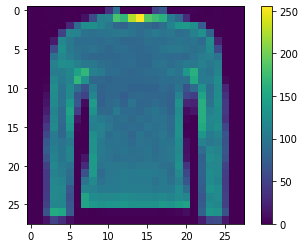

In [16]:
plt.imshow(train_images[37])
plt.colorbar()
plt.grid(False)
plt.show()

Pixel values are <0,255>. Due to performance reasons it is worth to normalize <0,1>

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

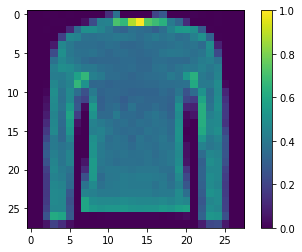

In [18]:
plt.imshow(train_images[37])
plt.colorbar()
plt.grid(False)
plt.show()

Introduce label naming and label some of them

In [31]:
train_labels[37]

2

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

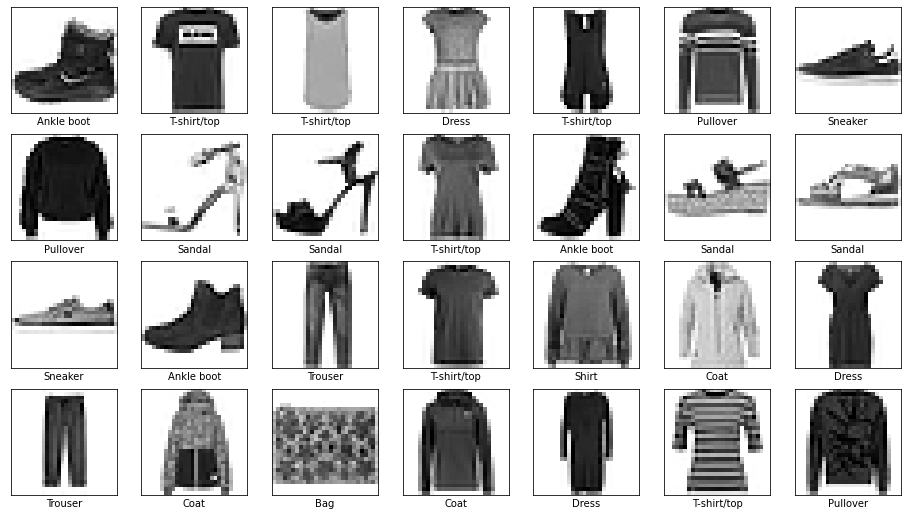

In [33]:
plt.figure(figsize=(16,16))
for i in range(28):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Prepare model: 1x input layer, 1x hidden layer with Rectified Linear Unit activation function, 1x output layer

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train model

In [61]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 506us/step - loss: 3.0743 - accuracy: 0.6857
Epoch 2/10
1875/1875 [==============================] - 1s 509us/step - loss: 0.7018 - accuracy: 0.7497
Epoch 3/10
1875/1875 [==============================] - 1s 512us/step - loss: 0.5866 - accuracy: 0.7943
Epoch 4/10
1875/1875 [==============================] - 1s 503us/step - loss: 0.5450 - accuracy: 0.8139
Epoch 5/10
1875/1875 [==============================] - 1s 514us/step - loss: 0.5295 - accuracy: 0.8197
Epoch 6/10
1875/1875 [==============================] - 1s 513us/step - loss: 0.5084 - accuracy: 0.8314
Epoch 7/10
1875/1875 [==============================] - 1s 530us/step - loss: 0.4991 - accuracy: 0.8338
Epoch 8/10
1875/1875 [==============================] - 1s 506us/step - loss: 0.4915 - accuracy: 0.8380
Epoch 9/10
1875/1875 [==============================] - 1s 509us/step - loss: 0.4800 - accuracy: 0.8406
Epoch 10/10
1875/1875 [==============================] - 1s 512u

Test accuracy with validation data

In [62]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5478 - accuracy: 0.8161

Test accuracy: 0.816100001335144


Save and convert model to tensorflow lite to be used in android

In [63]:
import tensorflow as tf

model.save("clothes-model.h5")
saved_model = tf.keras.models.load_model('clothes-model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(saved_model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp_5yu96hk/assets


INFO:tensorflow:Assets written to: /tmp/tmp_5yu96hk/assets


408532